In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

In [2]:
# Loading the data set
cancer = pd.read_csv('datasets/cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Checking the NaN cells
print(cancer.shape)
cancer.isna().sum()

(569, 33)


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
# Droping NaN cells and encoding the target values
cancer.dropna(axis=1, inplace=True)
encoder = LabelEncoder()
cancer.iloc[:,1] = encoder.fit_transform(cancer.iloc[:,1])
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Correlation matrix
cancer.iloc[:,:6].corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000


In [6]:
# Dropping the columns which have almost no correlation with the target
cancer.drop(['id', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se'], axis=1, inplace=True)
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Separating the data into X and y
X = cancer.drop(['diagnosis'], axis=1)
y = cancer['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

# scaling the variables(to get hopefully better performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

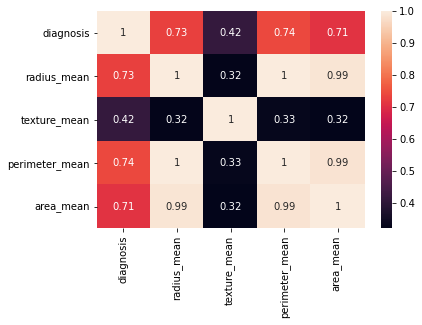

In [8]:
# Visualizing some correlations among the variables
corr_mat = cancer.iloc[:,:5].corr()
sns.heatmap(corr_mat, annot=True);

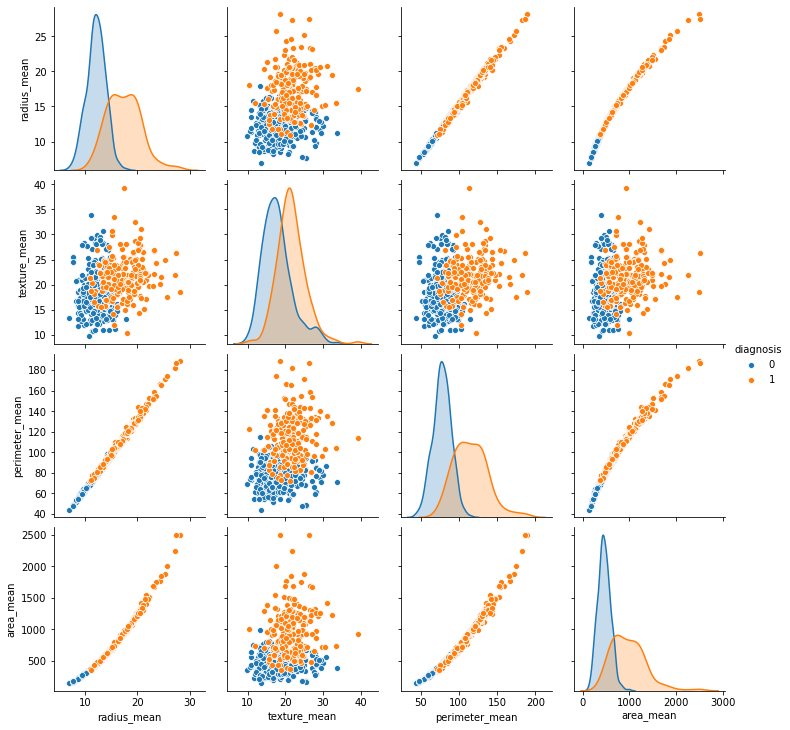

In [9]:
sns.pairplot(cancer.iloc[:,:5], hue='diagnosis');

---
# Decision Tree Classifier

One of the choices is to use a DT classifier since there are well-corrolated variables which seems to be separable with a simple boundaries in different axis. We can also observe the simplicity of this data set by looking at the pairplots provided above.

In [10]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred=y_pred, target_names=['M', 'B']))

              precision    recall  f1-score   support

           M       0.97      0.93      0.95       183
           B       0.89      0.94      0.91       102

    accuracy                           0.94       285
   macro avg       0.93      0.94      0.93       285
weighted avg       0.94      0.94      0.94       285



---
# VPI model

Another "must try" model is the VPI since it is highly probably from the pairplots that the similarity of two categories(B and M) of two points is highly dependent on the euclidean distance between them; more closer the points are, more probable that they are of the same category.

Best accuracy: 0.9719298245614035


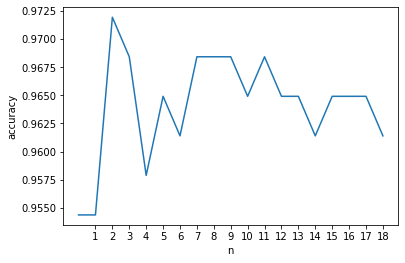

In [11]:
import vpi
import importlib
importlib.reload(vpi)
from vpi import *

accs = list()
for i in range(1,20):
    y_pred = vpi(X_test, X_train, y_train.values, n=i)
    acc = 0
    for j in range(len(y_pred)):
        if int(np.round(y_pred[j])) == y_test.values[j]:
            acc += 1
    accs.append(acc / len(y_pred))
print(f'Best accuracy: {max(accs)}')
plt.xlabel('n')
plt.ylabel('accuracy')
plt.xticks(np.arange(1,20,1))
plt.plot(accs);

The best accuracy occurs when n=2. This means, it is usually enough to look at two closer data points to classify the data with a high accuracy. The results are shown below for furthermore details.

In [12]:
y_pred = vpi(X_test, X_train, y_train.values, n=2)
y_pred = [int(np.round(y)) for y in y_pred]
print(classification_report(y_test, y_pred, target_names=['B', 'M']))

              precision    recall  f1-score   support

           B       0.97      0.96      0.96       183
           M       0.93      0.94      0.94       102

    accuracy                           0.95       285
   macro avg       0.95      0.95      0.95       285
weighted avg       0.95      0.95      0.95       285

